## <b> Main Program. <b>

In [1]:
import numpy as np
import pandas as pd
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
import re 

Reading data for New York Times.

In [2]:
df1 = pd.read_csv('Publications/NYT.csv')
df1.head(5)

,id,title,publication,author,date,year,month,url,content
0,17283,House Republicans Fret About Winning Their Hea...,New York Times,Carl Hulse,2016-12-31,2016.0,12.0,NaN,WASHINGTON — Congressional Republicans have...
1,17284,Rift Between Officers and Residents as Killing...,New York Times,Benjamin Mueller and Al Baker,2017-06-19,2017.0,6.0,NaN,"After the bullet shells get counted, the blood..."
2,17285,"Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial ...",New York Times,Margalit Fox,2017-01-06,2017.0,1.0,NaN,"When Walt Disney’s “Bambi” opened in 1942, cri..."
3,17286,"Among Deaths in 2016, a Heavy Toll in Pop Music",New York Times,William McDonald,2017-04-10,2017.0,4.0,NaN,"Death may be the great equalizer, but it isn’t..."
4,17287,Kim Jong-un Says North Korea Is Preparing to T...,New York Times,Choe Sang-Hun,2017-01-02,2017.0,1.0,NaN,"SEOUL, South Korea — North Korea’s leader, ..."


Reading data for CNN.

In [3]:
df2 = pd.read_csv('Publications/CNN.csv')
df2.head(5)

,id,title,publication,author,date,year,month,url,content
0,50358,Istanbul attack: Dozens killed at nightclub,CNN,Euan McKirdy,2016-12-31,2016.0,12.0,NaN,Istanbul (CNN) At least 39 people were killed ...
1,50359,"Alabama, Clemson back in national title game",CNN,Jill Martin,2016-12-31,2016.0,12.0,NaN,Atlanta (CNN) This season’s College Football P...
2,50360,New year celebrations ring in 2017,CNN,Ray Sanchez,2016-12-31,2016.0,12.0,NaN,(CNN) Revelers on the United States’ west coa...
3,50361,Trump says he has inside information on hacking,CNN,Kevin Liptak,2017-01-01,2017.0,1.0,NaN,"West Palm Beach, Florida (CNN) Donald Trump s..."
4,50362,3 dead in Texas plane crash collision,CNN,Tony Marco,2017-01-01,2017.0,1.0,NaN,(CNN) Two small planes collided in Texas on S...


Reading data for Washington Post.

In [4]:
df3 = pd.read_csv('Publications/WP.csv')
df3.head(5)

,id,title,publication,author,date,year,month,url,content
0,204033,Inside the economic war against the Islamic State,Washington Post,Joby Warrick,2016-12-31,2016.0,12.0,https://web.archive.org/web/20170101001641/htt...,The Islamic State starts the new year with a ...
1,204034,"Putin won 2016, but Russia has its limits as a...",Washington Post,David Filipov,2016-12-31,2016.0,12.0,https://web.archive.org/web/20170101001641/htt...,MOSCOW ” In a New Year s address that came ...
2,204035,Trump and Putin: A relationship where mutual a...,Washington Post,Karen DeYoung,2016-12-30,2016.0,12.0,https://web.archive.org/web/20170101001641/htt...,"For much of this year, Donald Trump and Vladi..."
3,204036,"Russian operation hacked a Vermont utility, sh...",Washington Post,Juliet Eilperin,2016-12-31,2016.0,12.0,https://web.archive.org/web/20170101001641/htt...,A code associated with the Russian hacking op...
4,204037,Trump’s victory was history rhyming with itsel...,Washington Post,Joe Scarborough,2016-12-31,2016.0,12.0,https://web.archive.org/web/20170101001641/htt...,Americans view the election of a presiden...


Columns in datasets.

In [5]:
df1.columns

Index(['id', 'title', 'publication', 'author', 'date', 'year', 'month', 'url',
       'content'],
      dtype='object')

In [6]:
df2.columns

Index(['id', 'title', 'publication', 'author', 'date', 'year', 'month', 'url',
       'content'],
      dtype='object')

In [7]:
df3.columns

Index(['id', 'title', 'publication', 'author', 'date', 'year', 'month', 'url',
       'content'],
      dtype='object')

# Data Preprocessing.

Remove punctuations and special characters.

In [8]:
def rm_puncs(sen):
    punc = '''!()-[]{};:'"\, <>./?@#$%^&*_~'''
    for ele in sen:  
        if ele in punc:  
            sen = sen.replace(ele, " ") 
    return sen

Removing non english characters.

In [9]:
def rm_noneng(sen): 
    test_list = word_tokenize(sen)
    res = [idx for idx in test_list if not re.findall("[^\u0000-\u05C0\u2100-\u214F]+", idx)]   
    return res

Removing stopwords.

In [10]:
def rm_stopwords(sen):
    stop_words = set(stopwords.words('english'))  
    filtered = [w for w in sen if not w in stop_words] 
    filtered = []  
    for w in sen: 
        if w not in stop_words: 
            filtered.append(w) 
    return filtered

Showing data preprocessing for two datasets in New York Times.

In [11]:
content = df1['content']
heading = df1['title']
n = df1.count() - 1
for i in range(0,2):
    s1 = rm_noneng(heading[i])
    s2 = rm_stopwords(s1)
    s3 = word_tokenize(rm_puncs(str(s2)))
    s3 = s3[:-4]
    print(s3,"\n\n")
    s1 = rm_noneng(content[i])
    s2 = rm_stopwords(s1)
    s3 = word_tokenize(rm_puncs(str(s2))) 
    print(s3,"\n\n")

['House', 'Republicans', 'Fret', 'About', 'Winning'] 


['WASHINGTON', 'Congressional', 'Republicans', 'new', 'fear', 'comes', 'health', 'care', 'lawsuit', 'Obama', 'administration', 'They', 'might', 'win', 'The', 'incoming', 'Trump', 'administration', 'could', 'choose', 'longer', 'defend', 'executive', 'branch', 'suit', 'challenges', 'administration', 'authority', 'spend', 'billions', 'dollars', 'health', 'insurance', 'subsidies', 'Americans', 'handing', 'House', 'Republicans', 'big', 'victory', 'issues', 'But', 'sudden', 'loss', 'disputed', 'subsidies', 'could', 'conceivably', 'cause', 'health', 'care', 'program', 'implode', 'leaving', 'millions', 'people', 'without', 'access', 'health', 'insurance', 'Republicans', 'prepared', 'replacement', 'That', 'could', 'lead', 'chaos', 'insurance', 'market', 'spur', 'political', 'backlash', 'Republicans', 'gain', 'full', 'control', 'government', 'To', 'stave', 'outcome', 'Republicans', 'could', 'find', 'awkward', 'position', 'appropriating', 'h

Showing data preprocessing for two datasets in CNN.

In [12]:
content = df2['content']
heading = df2['title']
n = df1.count() - 1
for i in range(0,2):
    s1 = rm_noneng(heading[i])
    s2 = rm_stopwords(s1)
    s3 = word_tokenize(rm_puncs(str(s2)))
    print(s3,"\n\n")
    s1 = rm_noneng(content[i])
    s2 = rm_stopwords(s1)
    s3 = word_tokenize(rm_puncs(str(s2))) 
    print(s3,"\n\n")

['Istanbul', 'attack', 'Dozens', 'killed', 'nightclub'] 


['Istanbul', 'CNN', 'At', 'least', '39', 'people', 'killed', 'least', '69', 'wounded', 'attack', 'nightclub', 'early', 'Sunday', 'celebrating', 'new', 'year', 'Turkey', 'Interior', 'Minister', 'said', 'We', 'face', 'face', 'terror', 'attack', 'Interior', 'minister', 'Suleyman', 'Soylu', 'told', 'reporters', 'dead', 'identified', 'said', 'Of', '16', 'foreign', 'nationals', 'five', 'Turkish', 'US', 'officials', 'also', 'called', 'terrorist', 'attack', 'making', 'first', '2017', 'Latest', 'developments', 'The', 'death', 'toll', 'Reina', 'nightclub', 'shooting', 'risen', '39The', 'number', 'injured', '69', 'Four', 'critical', 'condition', 'one', 'critical', 'says', 'Interior', 'MinisterAt', 'least', 'one', 'gunman', 'still', 'run', 'unclear', 'many', 'attackers', 'presentNo', 'claim', 'responsibility', 'yet', 'madeUS', 'Turkish', 'officials', 'say', 'incident', 'terrorist', 'attack', 'Soylu', 'also', 'said', 'efforts', 'locate', 't

Showing data preprocessing for two datasets in Washington Post.

In [13]:
content = df3['content']
heading = df3['title']
n = df1.count() - 1
for i in range(0,2):
    s1 = rm_noneng(heading[i])
    s2 = rm_stopwords(s1)
    s3 = word_tokenize(rm_puncs(str(s2)))
    print(s3,"\n\n")
    s1 = rm_noneng(content[i])
    s2 = rm_stopwords(s1)
    s3 = word_tokenize(rm_puncs(str(s2))) 
    print(s3,"\n\n")

['Inside', 'economic', 'war', 'Islamic', 'State'] 


['The', 'Islamic', 'State', 'starts', 'new', 'year', 'drastically', 'depleted', 'bank', 'account', 'counterterrorism', 'officials', 'say', 'following', 'months', 'intensified', 'efforts', 'deprive', 'Islamists', 'oil', 'profits', 'revenue', 'used', 'finance', 'military', 'operations', 'terrorist', 'attacks', 'abroad', 'Coalition', 'aircraft', 'past', '15', 'months', 'destroyed', '1', '200', 'tanker', 'trucks', 'including', '168', 'vehicles', 'struck', 'single', 'air', 'raid', 'Syria', 'early', 'December', 'also', 'using', 'new', 'weapons', 'tactics', 'inflict', 'lasting', 'damage', 'terrorists', 'remaining', 'oil', 'fields', 'U', 'S', 'Middle', 'Eastern', 'officials', 'say', 'The', 'military', 'strikes', 'paired', 'new', 'measures', 'intended', 'shut', 'financial', 'networks', 'used', 'Islamic', 'State', 'procure', 'supplies', 'pay', 'fighters', 'officials', 'say', 'Two', 'weeks', 'ago', 'U', 'S', 'Iraqi', 'governments', 'announced',

# K Means Clustering.

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pickle
import os.path
from os import path

K Means Clustering.

In [15]:
def kclust_elb(heading,filename):
    vectorizer = TfidfVectorizer(stop_words='english',analyzer = 'word')
    X = vectorizer.fit_transform(heading1)
    cost =[]
    for i in range(1,22):
        model = KMeans(n_clusters=i,max_iter=500)
        model.fit(X)
        cost.append(model.inertia_)
    plt.plot(range(1, 22), cost, color ='g', linewidth ='3') 
    plt.xlabel("Value of K") 
    plt.ylabel("Sqaured Error (Cost)") 
    plt.savefig(filename,facecolor = 'yellow')
    plt.show()

### For New York Times.

In [16]:
df1['title'] = df1['title'].str.replace('- The New York Times', '')

In [17]:
heading1 = np.array(df1['title'])
if(path.exists('Models/KMeans/M1')):
    model1 = pickle.load(open("Models/KMeans/M1", "rb"))
else:
    kclust_elb(heading1,'Plots/KMeans/M1.png')

In [18]:
heading1 = np.array(df1['title'])
if(path.exists('Models/KMeans/M1')):
    model1 = pickle.load(open("Models/KMeans/M1", "rb"))
else:
    vectorizer = TfidfVectorizer(stop_words='english',analyzer = 'word')
    X1 = vectorizer.fit_transform(heading1)
    model1 = KMeans(n_clusters = 14,verbose = 0,algorithm ='auto')
    model1.fit(X1)
    pickle.dump(model1, open("Models/KMeans/M1", 'wb'))

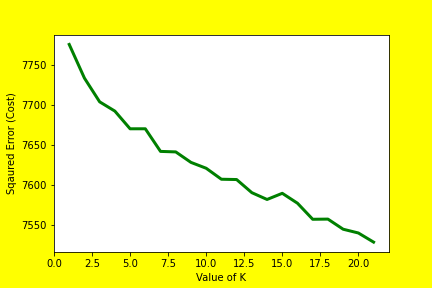

In [19]:
l1 = model1.labels_
df1["Label"] = l1
df1.to_csv("Publications/Edit/KMeans/NYT.csv", index=False)

0 - Democrats (Left)Foreign Policy. <br>
1 - Republicans(Right) Trump. <br>
2 - Democrats (Left) Hillary Clinton. <br>
3 - Republicans (Right) Trump vs Russia. <br>
4 - Republicans (Right) Trump vs Supreme Court. <br>
5 - Republicans (Right) Trump vs Hollywood. <br>
6 - Republicans (Right) Trump Campaign. <br>
7 - Democrats (Left) Govt Finanace Policies. <br>
8 - Democrats (Left) Govt vs Corporates. <br>
9 - Democrats (Left) Liberals. <br>
10 - Republicans (Right) Democrats vs Trump. <br>
11 - Republicans (Right) Cases on Trump. <br>
12 - Democrats (Left) Government Domestic Policy. <br>
13 - Republicans (Right) Trump Policies. <br>

In [20]:
k = []
for label in df1['Label']:
    if label == 0 or label == 2 or label == 7 or label == 8 or label == 9 or label == 13:
        k.append(0)
    else:
        k.append(1)
df1['Party1'] = k
df1.to_csv("Publications/Edit/KMeans/NYT.csv",index=False)

### For CNN.

In [21]:
heading2 = np.array(df2['title'].values.astype('U'))
if(path.exists('Models/KMeans/M2')):
    model2 = pickle.load(open("Models/KMeans/M2", "rb"))
else:
    kclust_elb(heading1,'Plots/KMeans/M2.png')

In [22]:
heading2 = np.array(df2['title'].values.astype('U'))
if(path.exists('Models/KMeans/M2')):
    model2 = pickle.load(open("Models/KMeans/M2", "rb"))
else:
    vectorizer = TfidfVectorizer(stop_words='english',analyzer = 'word')
    X2 = vectorizer.fit_transform(heading2)
    model2 = KMeans(n_clusters = 13,verbose = 0,algorithm ='auto')
    model2.fit(X2)
    pickle.dump(model2, open("Models/KMeans/M2", 'wb'))

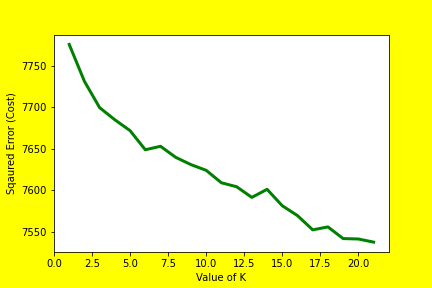

In [23]:
l2 = model2.labels_
df2["Label"] = l2
df2.to_csv("Publications/Edit/KMeans/CNN.csv",index=False)

0 - Democrats (Left) Govt Foreign Policy. <br>
1 - Democrats (Left) US in Korea. <br>
2 - Republican (Right) Right Wing Extremism. <br>
3 - Republican (Right) Russian Hacking. <br>
4 -  Democrats (Left) China vs US. <br>
5 -  Democrats (Left) Facts on Govt. <br>
6 - Republican (Right) Trump on immigration. <br>
7 - GOP (Right) GOP. <br>
8 - Democrats (Left) Govt on ISIS. <br>
9 -  Republican (Right) Trump. <br>
10 -  Republican (Right) Trump Foreign Policies. <br>
11 - Outliers. <br>
12 - Democrats (Left) Obama. <br>

In [24]:
k = []
for label in df2['Label']:
    if label == 0 or label == 1 or label == 4 or label == 5 or label == 9 or label == 10:
        k.append(0)
    elif label == 11:
        k.append(-1)
    else:
        k.append(1)
df2['Party1'] = k
df2.to_csv("Publications/Edit/KMeans/CNN.csv",index=False)

### For The Washington Post.

In [25]:
heading3 = np.array(df3['title'].values.astype('U'))
if(path.exists('Models/KMeans/M3')):
    model3 = pickle.load(open("Models/KMeans/M3", "rb"))
else:
    kclust_elb(heading1,'Plots/KMeans/M3.png')   

In [26]:
heading3 = np.array(df3['title'].values.astype('U'))
if(path.exists('Models/KMeans/M3')):
    model3 = pickle.load(open("Models/KMeans/M3", "rb"))
else:
    X3 = vectorizer.fit_transform(heading3)
    model3 = KMeans(n_clusters = 16,verbose = 0,algorithm = 'auto')
    model3.fit(X3)
    pickle.dump(model3, open("Models/KMeans/M3", 'wb'))

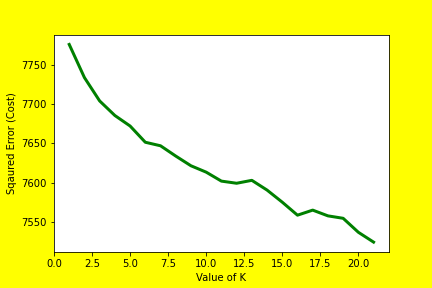

In [27]:
l3 = model3.labels_
df3["Label"] = l3
df3.to_csv("Publications/Edit/KMeans/WP.csv", index=False)

0 - Democrats (Left) US European Policy. <br>
1 - Democrats (Left) Army and National Security. <br>
2 - Democrats (Left) Hillary Clinton. <br>
3 - Republicans (Right) Donald Trump. <br>
4 - GOP (Right) GOP. <br>
5 - Democrats (Left) Govt on Terrorism. <br>
6 - Republican (Right) Trump Criticism. <br>
7 - Republican (Right)  Trump Administration. <br>
8 - Republican (Right) Trump on immigration. <br>
9 - Republican (Right) Trump healthcare. <br>
10 - Republican (Right) Trump and Russia. <br>
11 - Republican (Right) Trump innaguration. <br>
12 - Republican (Right) Trump Campaign. <br>
13 - Republican (Right)  Trump vs Media. <br>
14 - Republican (Right)  Trump Orders. <br>
15 - Democrats (Left) Obama. <br>

In [28]:
k = []
for label in df3['Label']:
    if label == 0 or label == 1 or label == 2 or label == 5 or label == 15:
        k.append(0)
    else:
        k.append(1)
df3['Party1'] = k
df3.to_csv("Publications/Edit/KMeans/WP.csv",index=False)

# Sample dataset creation

In [29]:
df = pd.read_csv('Publications/NYT.csv')
df1 = df[1:1000]
df1.head()

,id,title,publication,author,date,year,month,url,content
1,17284,Rift Between Officers and Residents as Killing...,New York Times,Benjamin Mueller and Al Baker,2017-06-19,2017.0,6.0,NaN,"After the bullet shells get counted, the blood..."
2,17285,"Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial ...",New York Times,Margalit Fox,2017-01-06,2017.0,1.0,NaN,"When Walt Disney’s “Bambi” opened in 1942, cri..."
3,17286,"Among Deaths in 2016, a Heavy Toll in Pop Music",New York Times,William McDonald,2017-04-10,2017.0,4.0,NaN,"Death may be the great equalizer, but it isn’t..."
4,17287,Kim Jong-un Says North Korea Is Preparing to T...,New York Times,Choe Sang-Hun,2017-01-02,2017.0,1.0,NaN,"SEOUL, South Korea — North Korea’s leader, ..."
5,17288,"Sick With a Cold, Queen Elizabeth Misses New Y...",New York Times,Sewell Chan,2017-01-02,2017.0,1.0,NaN,"LONDON — Queen Elizabeth II, who has been b..."


In [30]:
df = pd.read_csv('Publications/CNN.csv')
df2 = df[1:1000]
df2.head()

,id,title,publication,author,date,year,month,url,content
1,50359,"Alabama, Clemson back in national title game",CNN,Jill Martin,2016-12-31,2016.0,12.0,NaN,Atlanta (CNN) This season’s College Football P...
2,50360,New year celebrations ring in 2017,CNN,Ray Sanchez,2016-12-31,2016.0,12.0,NaN,(CNN) Revelers on the United States’ west coa...
3,50361,Trump says he has inside information on hacking,CNN,Kevin Liptak,2017-01-01,2017.0,1.0,NaN,"West Palm Beach, Florida (CNN) Donald Trump s..."
4,50362,3 dead in Texas plane crash collision,CNN,Tony Marco,2017-01-01,2017.0,1.0,NaN,(CNN) Two small planes collided in Texas on S...
5,50363,21 rescued from California theme park ride,CNN,NaN,2016-12-31,2016.0,12.0,NaN,(CNN) A ride up to see the sights of southern...


In [31]:
df = pd.read_csv('Publications/WP.csv')
df3 = df[1:1000]
df3.head()

,id,title,publication,author,date,year,month,url,content
1,204034,"Putin won 2016, but Russia has its limits as a...",Washington Post,David Filipov,2016-12-31,2016.0,12.0,https://web.archive.org/web/20170101001641/htt...,MOSCOW ” In a New Year s address that came ...
2,204035,Trump and Putin: A relationship where mutual a...,Washington Post,Karen DeYoung,2016-12-30,2016.0,12.0,https://web.archive.org/web/20170101001641/htt...,"For much of this year, Donald Trump and Vladi..."
3,204036,"Russian operation hacked a Vermont utility, sh...",Washington Post,Juliet Eilperin,2016-12-31,2016.0,12.0,https://web.archive.org/web/20170101001641/htt...,A code associated with the Russian hacking op...
4,204037,Trump’s victory was history rhyming with itsel...,Washington Post,Joe Scarborough,2016-12-31,2016.0,12.0,https://web.archive.org/web/20170101001641/htt...,Americans view the election of a presiden...
5,204038,It’s nearly 2017! Can we finally retire the cu...,Washington Post,Nicholas Pell,2016-12-30,2016.0,12.0,https://web.archive.org/web/20170101001641/htt...,"Looking back at 2016, it’s remarkable how..."


# DBSCAN Clustering

In [32]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

In [33]:
def dbs(heading,t_eps):
    vectorizer = TfidfVectorizer(stop_words='english')
    X = vectorizer.fit_transform(heading)
    model = DBSCAN(eps = t_eps,min_samples = 3, metric = 'euclidean')
    model.fit(X)
    return model  

In [34]:
def opt_eps(heading,filename):
    neigh = NearestNeighbors(n_neighbors=2)
    vectorizer = TfidfVectorizer(stop_words='english')
    X = vectorizer.fit_transform(heading)
    nbrs = neigh.fit(X)
    distances, indices = nbrs.kneighbors(X)
    distances = np.sort(distances, axis=0)
    distances = distances[:,1]
    plt.plot(distances)
    plt.xlabel("Distance") 
    plt.ylabel("Eps value") 
    plt.savefig(filename,facecolor = 'yellow')
    plt.show()

### For New York Times.

In [35]:
heading11 = np.array(df1['title'].values.astype('U'))
if(path.exists('Models/DBS/M1')):
    model11 = pickle.load(open("Models/DBS/M1", "rb"))
else:
    opt_eps(heading11,'Plots/DBS/M1.png')

In [36]:
heading11 = np.array(df1['title'].values.astype('U'))
t_eps = 1
if(path.exists('Models/DBS/M1')):
    model11 = pickle.load(open("Models/DBS/M1", "rb"))
else:
    X11 = vectorizer.fit_transform(heading3)
    model11 = dbs(heading11,t_eps)
    pickle.dump(model11, open("Models/DBS/M1", 'wb'))

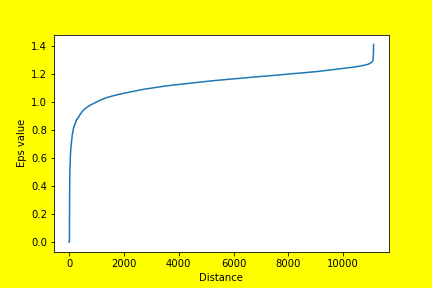

In [37]:
l1 = model11.labels_
df1["Label"] = l1
df1.to_csv("Publications/Edit/DBS/NYT.csv", index=False)

-1 - Democrats (Left) Government Policies. <br>
0 - Republicans(Right) Trump. <br>
1 - Republicans(Right) Trump moments.<br>
2 - Democrats(Left) Martin Luther King Jr.  
3 - Outlier. <br>
4 - Outlier. <br>

In [38]:
k = []
for label in df1['Label']:
    if label == -1 or label == 2:
        k.append(0)
    elif label == 3 or label == 4:
        k.append(-1)
    else:
        k.append(1)
df1['Party1'] = k
df1.to_csv("Publications/Edit/DBS/NYT.csv",index=False)

### For CNN.

In [39]:
heading22 = np.array(df2['title'].values.astype('U'))
if(path.exists('Models/DBS/M2')):
    model11 = pickle.load(open("Models/DBS/M2", "rb"))
else:
    opt_eps(heading22,'Plots/DBS/M2.png')

In [40]:
heading22 = np.array(df2['title'].values.astype('U'))
t_eps = 1
if(path.exists('Models/DBS/M2')):
    model22 = pickle.load(open("Models/DBS/M2", "rb"))
else:
    X22 = vectorizer.fit_transform(heading22)
    model22 = dbs(heading22,t_eps)
    pickle.dump(model22, open("Models/DBS/M2", 'wb'))

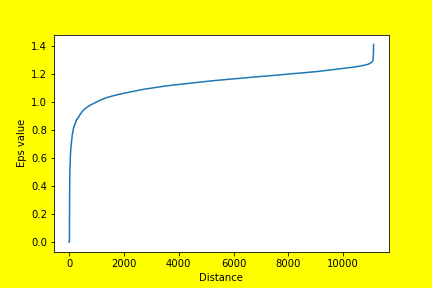

In [41]:
l2 = model22.labels_
df2["Label"] = l2
df2.to_csv("Publications/Edit/DBS/CNN.csv", index=False)

-1 - Republicans (Right) Trump<br>
0 - Outlier. <br>
1 - Republicans (Right) Gun Violence.<<br>
2 - Republicans (Right) Trump innaguration day.<br>
3 - Democrats (Left) Government Policies. <br>
4 - Republicans (Right) Trump bans.<br>
5 - Democrats (Left) US vs China.<br>

In [42]:
k = []
for label in df2['Label']:
    if label == 3 or label == 5:
        k.append(0)
    elif label == 0:
        k.append(-1)
    else:
        k.append(1)
df2['Party1'] = k
df2.to_csv("Publications/Edit/DBS/CNN.csv",index=False)

### For Washington Post.

In [43]:
heading33 = np.array(df3['title'].values.astype('U'))
if(path.exists('Models/DBS/M3')):
    model33 = pickle.load(open("Models/DBS/M3", "rb"))
else:
    opt_eps(heading33,'Plots/DBS/M3.png')

In [44]:
heading33 = np.array(df3['title'].values.astype('U'))
t_eps = 1
if(path.exists('Models/DBS/M3')):
    model33 = pickle.load(open("Models/DBS/M3", "rb"))
else:
    X33 = vectorizer.fit_transform(heading33)
    model33 = dbs(heading33,t_eps)
    pickle.dump(model33, open("Models/DBS/M3", 'wb'))

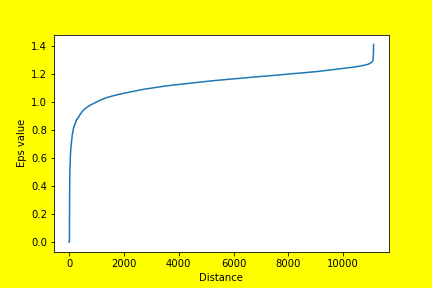

In [45]:
l3 = model33.labels_
df3["Label"] = l3
df3.to_csv("Publications/Edit/DBS/WP.csv", index=False)

<ipython-input-45-9cb7bedd6a82>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3["Label"] = l3


-1 - Republicans (Right) Trump as President<br>
0 - Outlier. <br>
1 - Democrats(Left) Women's Rights.<br>
2 - Republicans (Right) Trump vs Supreme Court.<br>
3 - Republicans (Right) Trump cases. <br>
4 - Democrats (Left) Democrats on Trump.<br>
5 - Republicans (Right) Sean Spicer.<br>

In [46]:
k = []
for label in df3['Label']:
    if label == 1 or label == 4:
        k.append(0)
    elif label == 0:
        k.append(-1)
    else:
        k.append(1)
df3['Party1'] = k
df3.to_csv("Publications/Edit/DBS/WP.csv",index=False)

<ipython-input-46-f258a5716b50>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Party1'] = k


# VADER Sentiment Analysis.

In [47]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer 

In [48]:
def vaders(article):
    sid_obj = SentimentIntensityAnalyzer() 
    sentiment_dict = sid_obj.polarity_scores(article)
    return sentiment_dict

In [49]:
def sentiment_vader(article):
    kmax = []
    for sent in article:
        sentiment = vaders(sent)
        sentiment.pop("compound")
        kmax.append(max(sentiment, key = sentiment.get))
    return kmax

## NY Times.

### KMeans data.

In [50]:
df1 = pd.read_csv('Publications/Edit/KMeans/NYT.csv')
df1 = df1[1:1000]
df1 = df1.to_csv('Publications/Edit/KMeans/NYT_new.csv',index = False)
df1 = pd.read_csv('Publications/Edit/KMeans/NYT_new.csv')
df1.head()

,id,title,publication,author,date,year,month,url,content,Label,Party1
0,17284,Rift Between Officers and Residents as Killing...,New York Times,Benjamin Mueller and Al Baker,2017-06-19,2017.0,6.0,NaN,"After the bullet shells get counted, the blood...",0,0
1,17285,"Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial ...",New York Times,Margalit Fox,2017-01-06,2017.0,1.0,NaN,"When Walt Disney’s “Bambi” opened in 1942, cri...",8,0
2,17286,"Among Deaths in 2016, a Heavy Toll in Pop Music",New York Times,William McDonald,2017-04-10,2017.0,4.0,NaN,"Death may be the great equalizer, but it isn’t...",8,0
3,17287,Kim Jong-un Says North Korea Is Preparing to T...,New York Times,Choe Sang-Hun,2017-01-02,2017.0,1.0,NaN,"SEOUL, South Korea — North Korea’s leader, ...",8,0
4,17288,"Sick With a Cold, Queen Elizabeth Misses New Y...",New York Times,Sewell Chan,2017-01-02,2017.0,1.0,NaN,"LONDON — Queen Elizabeth II, who has been b...",12,1


In [51]:
kmax = sentiment_vader(df1['content'])
df1["sent1"] = kmax

In [52]:
df1.to_csv("Publications/Edit/KMeans/NYT_new.csv", index=False)

In [53]:
df1['sent1'].value_counts()

neu    999
Name: sent1, dtype: int64

In [54]:
df1 = pd.read_csv('Publications/Edit/KMeans/NYT_new.csv')

In [55]:
k = []
n = len(df1)
for i in range(0,n):
    party = df1['Party1'][i]
    sent = df1['sent1'][i]
    if party == 0:
        if sent == 'neu':
            k.append(-1) 
        elif sent == 'pos':
            k.append(0)
        elif sent == 'neg':
            k.append(1)
    elif party == 1:
        if sent == 'neu':
            k.append(-1) 
        elif sent == 'pos':
            k.append(1)
        elif sent == 'neg':
            k.append(0)        
df1['Bias1'] = k
df1.to_csv("Publications/Edit/KMeans/NYT_new.csv",index=False)

### DBScan data.

In [56]:
df11 = pd.read_csv('Publications/Edit/DBS/NYT.csv')
df11 = df11[1:1000]
df11 = df11.to_csv('Publications/Edit/DBS/NYT_new.csv',index = False)
df11 = pd.read_csv('Publications/Edit/DBS/NYT_new.csv')
df11.head()

,id,title,publication,author,date,year,month,url,content,Label,Party1
0,17285,"Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial ...",New York Times,Margalit Fox,2017-01-06,2017.0,1.0,NaN,"When Walt Disney’s “Bambi” opened in 1942, cri...",-1,0
1,17286,"Among Deaths in 2016, a Heavy Toll in Pop Music",New York Times,William McDonald,2017-04-10,2017.0,4.0,NaN,"Death may be the great equalizer, but it isn’t...",-1,0
2,17287,Kim Jong-un Says North Korea Is Preparing to T...,New York Times,Choe Sang-Hun,2017-01-02,2017.0,1.0,NaN,"SEOUL, South Korea — North Korea’s leader, ...",-1,0
3,17288,"Sick With a Cold, Queen Elizabeth Misses New Y...",New York Times,Sewell Chan,2017-01-02,2017.0,1.0,NaN,"LONDON — Queen Elizabeth II, who has been b...",-1,0
4,17289,Taiwan’s President Accuses China of Renewed In...,New York Times,Javier C. Hernández,2017-01-02,2017.0,1.0,NaN,BEIJING — President Tsai of Taiwan sharpl...,-1,0


In [57]:
kmax = sentiment_vader(df11['content'])
df11["sent1"] = kmax

In [58]:
df11.to_csv("Publications/Edit/DBS/NYT_new.csv", index=False)

In [59]:
df11['sent1'].value_counts()

neu    998
Name: sent1, dtype: int64

In [60]:
df11 = pd.read_csv('Publications/Edit/DBS/NYT_new.csv')

In [61]:
k = []
n = len(df11)
for i in range(0,n):
    party = df11['Party1'][i]
    sent = df11['sent1'][i]
    if party == 0:
        if sent == 'neu':
            k.append(-1) 
        elif sent == 'pos':
            k.append(0)
        elif sent == 'neg':
            k.append(1)
    elif party == 1:
        if sent == 'neu':
            k.append(-1) 
        elif sent == 'pos':
            k.append(1)
        elif sent == 'neg':
            k.append(0)
    elif party == -1:
        k.append(-1)
df11['Bias1'] = k
df11.to_csv("Publications/Edit/DBS/NYT_new.csv",index=False)

## CNN.

### KMeans data.

In [62]:
df2 = pd.read_csv('Publications/Edit/KMeans/CNN.csv')
df2 = df2[1:1000]
df2 = df2.to_csv('Publications/Edit/KMeans/CNN_new.csv',index = False)
df2 = pd.read_csv('Publications/Edit/KMeans/CNN_new.csv')
df2.head()

,id,title,publication,author,date,year,month,url,content,Label,Party1
0,50359,"Alabama, Clemson back in national title game",CNN,Jill Martin,2016-12-31,2016.0,12.0,NaN,Atlanta (CNN) This season’s College Football P...,3,1
1,50360,New year celebrations ring in 2017,CNN,Ray Sanchez,2016-12-31,2016.0,12.0,NaN,(CNN) Revelers on the United States’ west coa...,0,0
2,50361,Trump says he has inside information on hacking,CNN,Kevin Liptak,2017-01-01,2017.0,1.0,NaN,"West Palm Beach, Florida (CNN) Donald Trump s...",2,1
3,50362,3 dead in Texas plane crash collision,CNN,Tony Marco,2017-01-01,2017.0,1.0,NaN,(CNN) Two small planes collided in Texas on S...,0,0
4,50363,21 rescued from California theme park ride,CNN,NaN,2016-12-31,2016.0,12.0,NaN,(CNN) A ride up to see the sights of southern...,3,1


In [63]:
kmax = sentiment_vader(df2['content'])
df2["sent1"] = kmax

In [64]:
df2.to_csv("Publications/Edit/KMeans/CNN_new.csv", index=False)

In [65]:
df2['sent1'].value_counts()

neu    999
Name: sent1, dtype: int64

In [66]:
df2 = pd.read_csv('Publications/Edit/KMeans/CNN_new.csv')

In [67]:
k = []
n = len(df2)
for i in range(0,n):
    party = df2['Party1'][i]
    sent = df2['sent1'][i]
    if party == 0:
        if sent == 'neu':
            k.append(-1) 
        elif sent == 'pos':
            k.append(0)
        elif sent == 'neg':
            k.append(1)
    elif party == 1:
        if sent == 'neu':
            k.append(-1) 
        elif sent == 'pos':
            k.append(1)
        elif sent == 'neg':
            k.append(0)
    elif party == -1:
        k.append(-1)
df2['Bias1'] = k
df2.to_csv("Publications/Edit/KMeans/CNN_new.csv",index=False)

### DBScan data.

In [68]:
df22 = pd.read_csv('Publications/Edit/DBS/CNN.csv')
df22 = df22[1:1000]
df22 = df22.to_csv('Publications/Edit/DBS/CNN_new.csv',index = False)
df22 = pd.read_csv('Publications/Edit/DBS/CNN_new.csv')
df22.head()

,id,title,publication,author,date,year,month,url,content,Label,Party1
0,50360,New year celebrations ring in 2017,CNN,Ray Sanchez,2016-12-31,2016.0,12.0,NaN,(CNN) Revelers on the United States’ west coa...,-1,1
1,50361,Trump says he has inside information on hacking,CNN,Kevin Liptak,2017-01-01,2017.0,1.0,NaN,"West Palm Beach, Florida (CNN) Donald Trump s...",-1,1
2,50362,3 dead in Texas plane crash collision,CNN,Tony Marco,2017-01-01,2017.0,1.0,NaN,(CNN) Two small planes collided in Texas on S...,-1,1
3,50363,21 rescued from California theme park ride,CNN,NaN,2016-12-31,2016.0,12.0,NaN,(CNN) A ride up to see the sights of southern...,-1,1
4,50364,Trump wishes Happy New Year to ’my many enemies’,CNN,Eugene Scott,2016-12-31,2016.0,12.0,NaN,(CNN) Donald Trump is not quite ready to let...,-1,1


In [69]:
kmax = sentiment_vader(df22['content'])
df22["sent1"] = kmax
df22.to_csv("Publications/Edit/DBS/CNN_new.csv", index=False)

In [70]:
df22['sent1'].value_counts()

neu    998
Name: sent1, dtype: int64

In [71]:
df22 = pd.read_csv('Publications/Edit/DBS/CNN_new.csv')

In [72]:
k = []
n = len(df22)
for i in range(0,n):
    party = df22['Party1'][i]
    sent = df22['sent1'][i]
    if party == 0:
        if sent == 'neu':
            k.append(-1) 
        elif sent == 'pos':
            k.append(0)
        elif sent == 'neg':
            k.append(1)
    elif party == 1:
        if sent == 'neu':
            k.append(-1) 
        elif sent == 'pos':
            k.append(1)
        elif sent == 'neg':
            k.append(0) 
    elif party == -1:
        k.append(-1)
df22['Bias1'] = k
df22.to_csv("Publications/Edit/DBS/CNN_new.csv",index=False)

## Washington Post.

### KMeans data.

In [73]:
df3 = pd.read_csv('Publications/Edit/KMeans/WP.csv')
df3 = df3[1:1000]
df3 = df3.to_csv('Publications/Edit/KMeans/WP_new.csv',index = False)
df3 = pd.read_csv('Publications/Edit/KMeans/WP_new.csv')
df3.head()

,id,title,publication,author,date,year,month,url,content,Label,Party1
0,204034,"Putin won 2016, but Russia has its limits as a...",Washington Post,David Filipov,2016-12-31,2016.0,12.0,https://web.archive.org/web/20170101001641/htt...,MOSCOW ” In a New Year s address that came ...,0,0
1,204035,Trump and Putin: A relationship where mutual a...,Washington Post,Karen DeYoung,2016-12-30,2016.0,12.0,https://web.archive.org/web/20170101001641/htt...,"For much of this year, Donald Trump and Vladi...",10,1
2,204036,"Russian operation hacked a Vermont utility, sh...",Washington Post,Juliet Eilperin,2016-12-31,2016.0,12.0,https://web.archive.org/web/20170101001641/htt...,A code associated with the Russian hacking op...,0,0
3,204037,Trump’s victory was history rhyming with itsel...,Washington Post,Joe Scarborough,2016-12-31,2016.0,12.0,https://web.archive.org/web/20170101001641/htt...,Americans view the election of a presiden...,10,1
4,204038,It’s nearly 2017! Can we finally retire the cu...,Washington Post,Nicholas Pell,2016-12-30,2016.0,12.0,https://web.archive.org/web/20170101001641/htt...,"Looking back at 2016, it’s remarkable how...",0,0


In [74]:
kmax = sentiment_vader(df3['content'])
df3["sent1"] = kmax
df3.to_csv("Publications/Edit/KMeans/WP_new.csv", index=False)

In [75]:
df3['sent1'].value_counts()

neu    999
Name: sent1, dtype: int64

In [76]:
df3 = pd.read_csv('Publications/Edit/KMeans/WP_new.csv')

In [77]:
k = []
n = len(df3)
for i in range(0,n):
    party = df3['Party1'][i]
    sent = df3['sent1'][i]
    if party == 0:
        if sent == 'neu':
            k.append(-1) 
        elif sent == 'pos':
            k.append(0)
        elif sent == 'neg':
            k.append(1)
    elif party == 1:
        if sent == 'neu':
            k.append(-1) 
        elif sent == 'pos':
            k.append(1)
        elif sent == 'neg':
            k.append(0) 
    elif party == -1:
        k.append(-1)
df3['Bias1'] = k
df3.to_csv("Publications/Edit/KMeans/WP_new.csv",index=False)

### DBScan data.

In [78]:
df33 = pd.read_csv('Publications/Edit/DBS/WP.csv')
df33 = df33[1:1000]
df33 = df33.to_csv('Publications/Edit/DBS/WP_new.csv',index = False)
df33 = pd.read_csv('Publications/Edit/DBS/WP_new.csv')
df33.head()

,id,title,publication,author,date,year,month,url,content,Label,Party1
0,204035,Trump and Putin: A relationship where mutual a...,Washington Post,Karen DeYoung,2016-12-30,2016.0,12.0,https://web.archive.org/web/20170101001641/htt...,"For much of this year, Donald Trump and Vladi...",-1,1
1,204036,"Russian operation hacked a Vermont utility, sh...",Washington Post,Juliet Eilperin,2016-12-31,2016.0,12.0,https://web.archive.org/web/20170101001641/htt...,A code associated with the Russian hacking op...,-1,1
2,204037,Trump’s victory was history rhyming with itsel...,Washington Post,Joe Scarborough,2016-12-31,2016.0,12.0,https://web.archive.org/web/20170101001641/htt...,Americans view the election of a presiden...,-1,1
3,204038,It’s nearly 2017! Can we finally retire the cu...,Washington Post,Nicholas Pell,2016-12-30,2016.0,12.0,https://web.archive.org/web/20170101001641/htt...,"Looking back at 2016, it’s remarkable how...",-1,1
4,204039,Five myths about the Presidentâ€™s Daily Brief,Washington Post,David Priess,2016-12-29,2016.0,12.0,https://web.archive.org/web/20170101001641/htt...,"David Priess, a former analyst and daily in...",-1,1


In [79]:
kmax = sentiment_vader(df33['content'])
df33["sent1"] = kmax

In [80]:
df33.to_csv("Publications/Edit/DBS/WP_new.csv", index=False)

In [81]:
df33['sent1'].value_counts()

neu    998
Name: sent1, dtype: int64

In [82]:
k = []
n = len(df33)
for i in range(0,n):
    party = df33['Party1'][i]
    sent = df33['sent1'][i]
    if party == 0:
        if sent == 'neu':
            k.append(-1) 
        elif sent == 'pos':
            k.append(0)
        elif sent == 'neg':
            k.append(1)
    elif party == 1:
        if sent == 'neu':
            k.append(-1) 
        elif sent == 'pos':
            k.append(1)
        elif sent == 'neg':
            k.append(0) 
    elif party == -1:
        k.append(-1)
df33['Bias1'] = k
df33.to_csv("Publications/Edit/DBS/WP_new.csv",index=False)

# Text Blob Sentiment Analysis.

In [83]:
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer

In [84]:
def textblob_sentiment(article):
    analysis = TextBlob(article).polarity
    return analysis

In [85]:
def sentiment_textblob(article):
    kmax = []
    for sent in df1['content']:
        sentiment = textblob_sentiment(sent)
        if sentiment <= 0.33 and sentiment >= -0.33:
            s = 0
        elif sentiment>=0.33:
            s = 1
        elif sentiment<=-0.33:
            s = -1
        kmax.append(s) 
    return kmax  

## NY Times. 

### KMeans data.

In [86]:
df1 = pd.read_csv('Publications/Edit/KMeans/NYT_new.csv')
kmax = sentiment_textblob(df1['content'])
df1["sent2"] = kmax
df1.to_csv("Publications/Edit/KMeans/NYT_new.csv", index=False)
df1.head()

,id,title,publication,author,date,year,month,url,content,Label,Party1,sent1,Bias1,sent2
0,17284,Rift Between Officers and Residents as Killing...,New York Times,Benjamin Mueller and Al Baker,2017-06-19,2017.0,6.0,NaN,"After the bullet shells get counted, the blood...",0,0,neu,-1,0
1,17285,"Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial ...",New York Times,Margalit Fox,2017-01-06,2017.0,1.0,NaN,"When Walt Disney’s “Bambi” opened in 1942, cri...",8,0,neu,-1,0
2,17286,"Among Deaths in 2016, a Heavy Toll in Pop Music",New York Times,William McDonald,2017-04-10,2017.0,4.0,NaN,"Death may be the great equalizer, but it isn’t...",8,0,neu,-1,0
3,17287,Kim Jong-un Says North Korea Is Preparing to T...,New York Times,Choe Sang-Hun,2017-01-02,2017.0,1.0,NaN,"SEOUL, South Korea — North Korea’s leader, ...",8,0,neu,-1,0
4,17288,"Sick With a Cold, Queen Elizabeth Misses New Y...",New York Times,Sewell Chan,2017-01-02,2017.0,1.0,NaN,"LONDON — Queen Elizabeth II, who has been b...",12,1,neu,-1,0


In [87]:
df1['sent2'].value_counts()

0    998
1      1
Name: sent2, dtype: int64

In [88]:
k = []
n = len(df1)
for i in range(0,n):
    party = df1['Party1'][i]
    sent = df1['sent2'][i]
    if party == 0:
        if sent == 0:
            k.append(-1) 
        elif sent == 1:
            k.append(0)
        elif sent == -1:
            k.append(1)
    elif party == 1:
        if sent == 0:
            k.append(-1) 
        elif sent == 1:
            k.append(1)
        elif sent == -1:
            k.append(0)        
df1['Bias2'] = k
df1.to_csv("Publications/Edit/KMeans/NYT_new.csv",index=False)

### DBScan data.

In [89]:
df11 = pd.read_csv('Publications/Edit/DBS/NYT_new.csv')
kmax = sentiment_textblob(df11['content'])
kmax.pop()
df11["sent2"] = kmax
df11.to_csv("Publications/Edit/DBS/NYT_new.csv", index=False)
df11.head()

,id,title,publication,author,date,year,month,url,content,Label,Party1,sent1,Bias1,sent2
0,17285,"Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial ...",New York Times,Margalit Fox,2017-01-06,2017.0,1.0,NaN,"When Walt Disney’s “Bambi” opened in 1942, cri...",-1,0,neu,-1,0
1,17286,"Among Deaths in 2016, a Heavy Toll in Pop Music",New York Times,William McDonald,2017-04-10,2017.0,4.0,NaN,"Death may be the great equalizer, but it isn’t...",-1,0,neu,-1,0
2,17287,Kim Jong-un Says North Korea Is Preparing to T...,New York Times,Choe Sang-Hun,2017-01-02,2017.0,1.0,NaN,"SEOUL, South Korea — North Korea’s leader, ...",-1,0,neu,-1,0
3,17288,"Sick With a Cold, Queen Elizabeth Misses New Y...",New York Times,Sewell Chan,2017-01-02,2017.0,1.0,NaN,"LONDON — Queen Elizabeth II, who has been b...",-1,0,neu,-1,0
4,17289,Taiwan’s President Accuses China of Renewed In...,New York Times,Javier C. Hernández,2017-01-02,2017.0,1.0,NaN,BEIJING — President Tsai of Taiwan sharpl...,-1,0,neu,-1,0


In [90]:
df11['sent2'].value_counts()

0    997
1      1
Name: sent2, dtype: int64

In [91]:
k = []
n = len(df11)
for i in range(0,n):
    party = df11['Party1'][i]
    sent = df11['sent2'][i]
    if party == 0:
        if sent == 0:
            k.append(-1) 
        elif sent == 1:
            k.append(0)
        elif sent == -1:
            k.append(1)
    elif party == 1:
        if sent == 0:
            k.append(-1) 
        elif sent == 1:
            k.append(1)
        elif sent == -1:
            k.append(0)
    elif party == -1:
        k.append(-1)
df11['Bias2'] = k
df11.to_csv("Publications/Edit/DBS/NYT_new.csv",index=False)

## CNN. 

### KMeans data.

In [92]:
df2 = pd.read_csv('Publications/Edit/KMeans/CNN_new.csv')
kmax = sentiment_textblob(df2['content'])
df2["sent2"] = kmax
df2.to_csv("Publications/Edit/KMeans/CNN_new.csv", index=False)
df2.head()

,id,title,publication,author,date,year,month,url,content,Label,Party1,sent1,Bias1,sent2
0,50359,"Alabama, Clemson back in national title game",CNN,Jill Martin,2016-12-31,2016.0,12.0,NaN,Atlanta (CNN) This season’s College Football P...,3,1,neu,-1,0
1,50360,New year celebrations ring in 2017,CNN,Ray Sanchez,2016-12-31,2016.0,12.0,NaN,(CNN) Revelers on the United States’ west coa...,0,0,neu,-1,0
2,50361,Trump says he has inside information on hacking,CNN,Kevin Liptak,2017-01-01,2017.0,1.0,NaN,"West Palm Beach, Florida (CNN) Donald Trump s...",2,1,neu,-1,0
3,50362,3 dead in Texas plane crash collision,CNN,Tony Marco,2017-01-01,2017.0,1.0,NaN,(CNN) Two small planes collided in Texas on S...,0,0,neu,-1,0
4,50363,21 rescued from California theme park ride,CNN,NaN,2016-12-31,2016.0,12.0,NaN,(CNN) A ride up to see the sights of southern...,3,1,neu,-1,0


In [93]:
df2['sent2'].value_counts()

0    998
1      1
Name: sent2, dtype: int64

In [94]:
k = []
n = len(df2)
for i in range(0,n):
    party = df2['Party1'][i]
    sent = df2['sent2'][i]
    if party == 0:
        if sent == 0:
            k.append(-1) 
        elif sent == 1:
            k.append(0)
        elif sent == -1:
            k.append(1)
    elif party == 1:
        if sent == 0:
            k.append(-1) 
        elif sent == 1:
            k.append(1)
        elif sent == -1:
            k.append(0)
    elif party == -1:
        k.append(-1)
df2['Bias2'] = k
df2.to_csv("Publications/Edit/KMeans/CNN_new.csv",index=False)

### DBScan data.

In [95]:
df22 = pd.read_csv('Publications/Edit/DBS/CNN_new.csv')
kmax = sentiment_textblob(df22['content'])
kmax.pop()
df22["sent2"] = kmax
df22.to_csv("Publications/Edit/DBS/CNN_new.csv", index=False)
df22.head()

,id,title,publication,author,date,year,month,url,content,Label,Party1,sent1,Bias1,sent2
0,50360,New year celebrations ring in 2017,CNN,Ray Sanchez,2016-12-31,2016.0,12.0,NaN,(CNN) Revelers on the United States’ west coa...,-1,1,neu,-1,0
1,50361,Trump says he has inside information on hacking,CNN,Kevin Liptak,2017-01-01,2017.0,1.0,NaN,"West Palm Beach, Florida (CNN) Donald Trump s...",-1,1,neu,-1,0
2,50362,3 dead in Texas plane crash collision,CNN,Tony Marco,2017-01-01,2017.0,1.0,NaN,(CNN) Two small planes collided in Texas on S...,-1,1,neu,-1,0
3,50363,21 rescued from California theme park ride,CNN,NaN,2016-12-31,2016.0,12.0,NaN,(CNN) A ride up to see the sights of southern...,-1,1,neu,-1,0
4,50364,Trump wishes Happy New Year to ’my many enemies’,CNN,Eugene Scott,2016-12-31,2016.0,12.0,NaN,(CNN) Donald Trump is not quite ready to let...,-1,1,neu,-1,0


In [96]:
df22['sent2'].value_counts()

0    997
1      1
Name: sent2, dtype: int64

In [97]:
k = []
n = len(df22)
for i in range(0,n):
    party = df22['Party1'][i]
    sent = df22['sent2'][i]
    if party == 0:
        if sent == 0:
            k.append(-1) 
        elif sent == 1:
            k.append(0)
        elif sent == -1:
            k.append(1)
    elif party == 1:
        if sent == 0:
            k.append(-1) 
        elif sent == 1:
            k.append(1)
        elif sent == -1:
            k.append(0) 
    elif party == -1:
        k.append(-1)
df22['Bias2'] = k
df22.to_csv("Publications/Edit/DBS/CNN_new.csv",index=False)

## Washington Post. 

### KMeans data.

In [98]:
df3 = pd.read_csv('Publications/Edit/KMeans/WP_new.csv')
kmax = sentiment_textblob(df3['content'])
df3["sent2"] = kmax
df3.to_csv("Publications/Edit/KMeans/WP_new.csv", index=False)
df3.head()

,id,title,publication,author,date,year,month,url,content,Label,Party1,sent1,Bias1,sent2
0,204034,"Putin won 2016, but Russia has its limits as a...",Washington Post,David Filipov,2016-12-31,2016.0,12.0,https://web.archive.org/web/20170101001641/htt...,MOSCOW ” In a New Year s address that came ...,0,0,neu,-1,0
1,204035,Trump and Putin: A relationship where mutual a...,Washington Post,Karen DeYoung,2016-12-30,2016.0,12.0,https://web.archive.org/web/20170101001641/htt...,"For much of this year, Donald Trump and Vladi...",10,1,neu,-1,0
2,204036,"Russian operation hacked a Vermont utility, sh...",Washington Post,Juliet Eilperin,2016-12-31,2016.0,12.0,https://web.archive.org/web/20170101001641/htt...,A code associated with the Russian hacking op...,0,0,neu,-1,0
3,204037,Trump’s victory was history rhyming with itsel...,Washington Post,Joe Scarborough,2016-12-31,2016.0,12.0,https://web.archive.org/web/20170101001641/htt...,Americans view the election of a presiden...,10,1,neu,-1,0
4,204038,It’s nearly 2017! Can we finally retire the cu...,Washington Post,Nicholas Pell,2016-12-30,2016.0,12.0,https://web.archive.org/web/20170101001641/htt...,"Looking back at 2016, it’s remarkable how...",0,0,neu,-1,0


In [99]:
df3['sent2'].value_counts()

0    998
1      1
Name: sent2, dtype: int64

In [100]:
k = []
n = len(df3)
for i in range(0,n):
    party = df3['Party1'][i]
    sent = df3['sent2'][i]
    if party == 0:
        if sent == 0:
            k.append(-1) 
        elif sent == 1:
            k.append(0)
        elif sent == -1:
            k.append(1)
    elif party == 1:
        if sent == 0:
            k.append(-1) 
        elif sent == 1:
            k.append(1)
        elif sent == -1:
            k.append(0) 
    elif party == -1:
        k.append(-1)
df3['Bias2'] = k
df3.to_csv("Publications/Edit/KMeans/WP_new.csv",index=False)

### DBScan data.

In [101]:
df33 = pd.read_csv('Publications/Edit/DBS/WP_new.csv')
kmax = sentiment_textblob(df33['content'])
kmax.pop()
df33["sent2"] = kmax
df33.to_csv("Publications/Edit/DBS/WP_new.csv", index=False)
df33.head()

,id,title,publication,author,date,year,month,url,content,Label,Party1,sent1,Bias1,sent2
0,204035,Trump and Putin: A relationship where mutual a...,Washington Post,Karen DeYoung,2016-12-30,2016.0,12.0,https://web.archive.org/web/20170101001641/htt...,"For much of this year, Donald Trump and Vladi...",-1,1,neu,-1,0
1,204036,"Russian operation hacked a Vermont utility, sh...",Washington Post,Juliet Eilperin,2016-12-31,2016.0,12.0,https://web.archive.org/web/20170101001641/htt...,A code associated with the Russian hacking op...,-1,1,neu,-1,0
2,204037,Trump’s victory was history rhyming with itsel...,Washington Post,Joe Scarborough,2016-12-31,2016.0,12.0,https://web.archive.org/web/20170101001641/htt...,Americans view the election of a presiden...,-1,1,neu,-1,0
3,204038,It’s nearly 2017! Can we finally retire the cu...,Washington Post,Nicholas Pell,2016-12-30,2016.0,12.0,https://web.archive.org/web/20170101001641/htt...,"Looking back at 2016, it’s remarkable how...",-1,1,neu,-1,0
4,204039,Five myths about the Presidentâ€™s Daily Brief,Washington Post,David Priess,2016-12-29,2016.0,12.0,https://web.archive.org/web/20170101001641/htt...,"David Priess, a former analyst and daily in...",-1,1,neu,-1,0


In [102]:
df33['sent2'].value_counts()

0    997
1      1
Name: sent2, dtype: int64

In [103]:
k = []
n = len(df33)
for i in range(0,n):
    party = df33['Party1'][i]
    sent = df33['sent2'][i]
    if party == 0:
        if sent == 0:
            k.append(-1) 
        elif sent == 1:
            k.append(0)
        elif sent == -1:
            k.append(1)
    elif party == 1:
        if sent == 0:
            k.append(-1) 
        elif sent == 1:
            k.append(1)
        elif sent == -1:
            k.append(0) 
    elif party == -1:
        k.append(-1)
df33['Bias2'] = k
df33.to_csv("Publications/Edit/DBS/WP_new.csv",index=False)

# Bias Table.

## NY Times.

### KMeans data.

In [104]:
df1 = pd.read_csv("Publications/Edit/KMeans/NYT_new.csv")
df1.head()

,id,title,publication,author,date,year,month,url,content,Label,Party1,sent1,Bias1,sent2,Bias2
0,17284,Rift Between Officers and Residents as Killing...,New York Times,Benjamin Mueller and Al Baker,2017-06-19,2017.0,6.0,NaN,"After the bullet shells get counted, the blood...",0,0,neu,-1,0,-1
1,17285,"Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial ...",New York Times,Margalit Fox,2017-01-06,2017.0,1.0,NaN,"When Walt Disney’s “Bambi” opened in 1942, cri...",8,0,neu,-1,0,-1
2,17286,"Among Deaths in 2016, a Heavy Toll in Pop Music",New York Times,William McDonald,2017-04-10,2017.0,4.0,NaN,"Death may be the great equalizer, but it isn’t...",8,0,neu,-1,0,-1
3,17287,Kim Jong-un Says North Korea Is Preparing to T...,New York Times,Choe Sang-Hun,2017-01-02,2017.0,1.0,NaN,"SEOUL, South Korea — North Korea’s leader, ...",8,0,neu,-1,0,-1
4,17288,"Sick With a Cold, Queen Elizabeth Misses New Y...",New York Times,Sewell Chan,2017-01-02,2017.0,1.0,NaN,"LONDON — Queen Elizabeth II, who has been b...",12,1,neu,-1,0,-1


Bias by vader.

In [105]:
neu = 0
left = 0
right = 0
for bias in df1['Bias1']:
    if bias == -1:
        neu = neu + 1
    elif bias == 0:
        left = left + 1
    elif bias == 1:
        right = right + 1
print("Left bias =",left)
print("Right bias =",right)        
print("No bias =",neu)        

Left bias = 0
Right bias = 0
No bias = 999


Bias by textblob.

In [106]:
neu = 0
left = 0
right = 0
for bias in df1['Bias2']:
    if bias == -1:
        neu = neu + 1
    elif bias == 0:
        left = left + 1
    elif bias == 1:
        right = right + 1
print("Left bias =",left)
print("Right bias =",right)        
print("No bias =",neu)  

Left bias = 1
Right bias = 0
No bias = 998


### DBScan data.

In [107]:
df11 = pd.read_csv("Publications/Edit/DBS/NYT_new.csv")
df11.head()

,id,title,publication,author,date,year,month,url,content,Label,Party1,sent1,Bias1,sent2,Bias2
0,17285,"Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial ...",New York Times,Margalit Fox,2017-01-06,2017.0,1.0,NaN,"When Walt Disney’s “Bambi” opened in 1942, cri...",-1,0,neu,-1,0,-1
1,17286,"Among Deaths in 2016, a Heavy Toll in Pop Music",New York Times,William McDonald,2017-04-10,2017.0,4.0,NaN,"Death may be the great equalizer, but it isn’t...",-1,0,neu,-1,0,-1
2,17287,Kim Jong-un Says North Korea Is Preparing to T...,New York Times,Choe Sang-Hun,2017-01-02,2017.0,1.0,NaN,"SEOUL, South Korea — North Korea’s leader, ...",-1,0,neu,-1,0,-1
3,17288,"Sick With a Cold, Queen Elizabeth Misses New Y...",New York Times,Sewell Chan,2017-01-02,2017.0,1.0,NaN,"LONDON — Queen Elizabeth II, who has been b...",-1,0,neu,-1,0,-1
4,17289,Taiwan’s President Accuses China of Renewed In...,New York Times,Javier C. Hernández,2017-01-02,2017.0,1.0,NaN,BEIJING — President Tsai of Taiwan sharpl...,-1,0,neu,-1,0,-1


Bias by vader.

In [108]:
neu = 0
left = 0
right = 0
for bias in df11['Bias1']:
    if bias == -1:
        neu = neu + 1
    elif bias == 0:
        left = left + 1
    elif bias == 1:
        right = right + 1
print("Left bias =",left)
print("Right bias =",right)        
print("No bias =",neu)  

Left bias = 0
Right bias = 0
No bias = 998


Bias by textblob.

In [109]:
neu = 0
left = 0
right = 0
for bias in df11['Bias2']:
    if bias == -1:
        neu = neu + 1
    elif bias == 0:
        left = left + 1
    elif bias == 1:
        right = right + 1
print("Left bias =",left)
print("Right bias =",right)        
print("No bias =",neu)

Left bias = 1
Right bias = 0
No bias = 997


## CNN.

### KMeans data.

In [110]:
df2 = pd.read_csv("Publications/Edit/KMeans/CNN_new.csv")
df2.head()

,id,title,publication,author,date,year,month,url,content,Label,Party1,sent1,Bias1,sent2,Bias2
0,50359,"Alabama, Clemson back in national title game",CNN,Jill Martin,2016-12-31,2016.0,12.0,NaN,Atlanta (CNN) This season’s College Football P...,3,1,neu,-1,0,-1
1,50360,New year celebrations ring in 2017,CNN,Ray Sanchez,2016-12-31,2016.0,12.0,NaN,(CNN) Revelers on the United States’ west coa...,0,0,neu,-1,0,-1
2,50361,Trump says he has inside information on hacking,CNN,Kevin Liptak,2017-01-01,2017.0,1.0,NaN,"West Palm Beach, Florida (CNN) Donald Trump s...",2,1,neu,-1,0,-1
3,50362,3 dead in Texas plane crash collision,CNN,Tony Marco,2017-01-01,2017.0,1.0,NaN,(CNN) Two small planes collided in Texas on S...,0,0,neu,-1,0,-1
4,50363,21 rescued from California theme park ride,CNN,NaN,2016-12-31,2016.0,12.0,NaN,(CNN) A ride up to see the sights of southern...,3,1,neu,-1,0,-1


Bias by vader.

In [111]:
neu = 0
left = 0
right = 0
for bias in df2['Bias1']:
    if bias == -1:
        neu = neu + 1
    elif bias == 0:
        left = left + 1
    elif bias == 1:
        right = right + 1
print("Left bias =",left)
print("Right bias =",right)        
print("No bias =",neu)

Left bias = 0
Right bias = 0
No bias = 999


Bias by textblob.

In [112]:
neu = 0
left = 0
right = 0
for bias in df2['Bias2']:
    if bias == -1:
        neu = neu + 1
    elif bias == 0:
        left = left + 1
    elif bias == 1:
        right = right + 1
print("Left bias =",left)
print("Right bias =",right)        
print("No bias =",neu)

Left bias = 0
Right bias = 1
No bias = 998


### DBScan data. 

In [113]:
df2 = pd.read_csv("Publications/Edit/DBS/CNN_new.csv")
df2.head()

,id,title,publication,author,date,year,month,url,content,Label,Party1,sent1,Bias1,sent2,Bias2
0,50360,New year celebrations ring in 2017,CNN,Ray Sanchez,2016-12-31,2016.0,12.0,NaN,(CNN) Revelers on the United States’ west coa...,-1,1,neu,-1,0,-1
1,50361,Trump says he has inside information on hacking,CNN,Kevin Liptak,2017-01-01,2017.0,1.0,NaN,"West Palm Beach, Florida (CNN) Donald Trump s...",-1,1,neu,-1,0,-1
2,50362,3 dead in Texas plane crash collision,CNN,Tony Marco,2017-01-01,2017.0,1.0,NaN,(CNN) Two small planes collided in Texas on S...,-1,1,neu,-1,0,-1
3,50363,21 rescued from California theme park ride,CNN,NaN,2016-12-31,2016.0,12.0,NaN,(CNN) A ride up to see the sights of southern...,-1,1,neu,-1,0,-1
4,50364,Trump wishes Happy New Year to ’my many enemies’,CNN,Eugene Scott,2016-12-31,2016.0,12.0,NaN,(CNN) Donald Trump is not quite ready to let...,-1,1,neu,-1,0,-1


Bias by vader.

In [114]:
neu = 0
left = 0
right = 0
for bias in df22['Bias1']:
    if bias == -1:
        neu = neu + 1
    elif bias == 0:
        left = left + 1
    elif bias == 1:
        right = right + 1
print("Left bias =",left)
print("Right bias =",right)        
print("No bias =",neu)

Left bias = 0
Right bias = 0
No bias = 998


Bias by textblob.

In [115]:
neu = 0
left = 0
right = 0
for bias in df22['Bias2']:
    if bias == -1:
        neu = neu + 1
    elif bias == 0:
        left = left + 1
    elif bias == 1:
        right = right + 1
print("Left bias =",left)
print("Right bias =",right)        
print("No bias =",neu)

Left bias = 0
Right bias = 1
No bias = 997


## Washington Post. 

### KMeans data. 

In [116]:
df3 = pd.read_csv("Publications/Edit/KMeans/WP_new.csv")
df3.head()

,id,title,publication,author,date,year,month,url,content,Label,Party1,sent1,Bias1,sent2,Bias2
0,204034,"Putin won 2016, but Russia has its limits as a...",Washington Post,David Filipov,2016-12-31,2016.0,12.0,https://web.archive.org/web/20170101001641/htt...,MOSCOW ” In a New Year s address that came ...,0,0,neu,-1,0,-1
1,204035,Trump and Putin: A relationship where mutual a...,Washington Post,Karen DeYoung,2016-12-30,2016.0,12.0,https://web.archive.org/web/20170101001641/htt...,"For much of this year, Donald Trump and Vladi...",10,1,neu,-1,0,-1
2,204036,"Russian operation hacked a Vermont utility, sh...",Washington Post,Juliet Eilperin,2016-12-31,2016.0,12.0,https://web.archive.org/web/20170101001641/htt...,A code associated with the Russian hacking op...,0,0,neu,-1,0,-1
3,204037,Trump’s victory was history rhyming with itsel...,Washington Post,Joe Scarborough,2016-12-31,2016.0,12.0,https://web.archive.org/web/20170101001641/htt...,Americans view the election of a presiden...,10,1,neu,-1,0,-1
4,204038,It’s nearly 2017! Can we finally retire the cu...,Washington Post,Nicholas Pell,2016-12-30,2016.0,12.0,https://web.archive.org/web/20170101001641/htt...,"Looking back at 2016, it’s remarkable how...",0,0,neu,-1,0,-1


Bias by vader.

In [117]:
neu = 0
left = 0
right = 0
for bias in df3['Bias1']:
    if bias == -1:
        neu = neu + 1
    elif bias == 0:
        left = left + 1
    elif bias == 1:
        right = right + 1
print("Left bias =",left)
print("Right bias =",right)        
print("No bias =",neu)

Left bias = 0
Right bias = 0
No bias = 999


Bias by textblob.

In [118]:
neu = 0
left = 0
right = 0
for bias in df3['Bias2']:
    if bias == -1:
        neu = neu + 1
    elif bias == 0:
        left = left + 1
    elif bias == 1:
        right = right + 1
print("Left bias =",left)
print("Right bias =",right)        
print("No bias =",neu)

Left bias = 1
Right bias = 0
No bias = 998


### DBScan data.

In [119]:
df33 = pd.read_csv("Publications/Edit/DBS/WP_new.csv")
df33.head()

,id,title,publication,author,date,year,month,url,content,Label,Party1,sent1,Bias1,sent2,Bias2
0,204035,Trump and Putin: A relationship where mutual a...,Washington Post,Karen DeYoung,2016-12-30,2016.0,12.0,https://web.archive.org/web/20170101001641/htt...,"For much of this year, Donald Trump and Vladi...",-1,1,neu,-1,0,-1
1,204036,"Russian operation hacked a Vermont utility, sh...",Washington Post,Juliet Eilperin,2016-12-31,2016.0,12.0,https://web.archive.org/web/20170101001641/htt...,A code associated with the Russian hacking op...,-1,1,neu,-1,0,-1
2,204037,Trump’s victory was history rhyming with itsel...,Washington Post,Joe Scarborough,2016-12-31,2016.0,12.0,https://web.archive.org/web/20170101001641/htt...,Americans view the election of a presiden...,-1,1,neu,-1,0,-1
3,204038,It’s nearly 2017! Can we finally retire the cu...,Washington Post,Nicholas Pell,2016-12-30,2016.0,12.0,https://web.archive.org/web/20170101001641/htt...,"Looking back at 2016, it’s remarkable how...",-1,1,neu,-1,0,-1
4,204039,Five myths about the Presidentâ€™s Daily Brief,Washington Post,David Priess,2016-12-29,2016.0,12.0,https://web.archive.org/web/20170101001641/htt...,"David Priess, a former analyst and daily in...",-1,1,neu,-1,0,-1


Bias by vader.

In [120]:
neu = 0
left = 0
right = 0
for bias in df33['Bias1']:
    if bias == -1:
        neu = neu + 1
    elif bias == 0:
        left = left + 1
    elif bias == 1:
        right = right + 1
print("Left bias =",left)
print("Right bias =",right)        
print("No bias =",neu)

Left bias = 0
Right bias = 0
No bias = 998


Bias by textblob.

In [121]:
neu = 0
left = 0
right = 0
for bias in df33['Bias2']:
    if bias == -1:
        neu = neu + 1
    elif bias == 0:
        left = left + 1
    elif bias == 1:
        right = right + 1
print("Left bias =",left)
print("Right bias =",right)        
print("No bias =",neu)

Left bias = 0
Right bias = 1
No bias = 997


# Plots. 

## NY Times.

### KMeans data.

In [122]:
df1 = pd.read_csv("Publications/Edit/KMeans/NYT_new.csv")
df1.head()

,id,title,publication,author,date,year,month,url,content,Label,Party1,sent1,Bias1,sent2,Bias2
0,17284,Rift Between Officers and Residents as Killing...,New York Times,Benjamin Mueller and Al Baker,2017-06-19,2017.0,6.0,NaN,"After the bullet shells get counted, the blood...",0,0,neu,-1,0,-1
1,17285,"Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial ...",New York Times,Margalit Fox,2017-01-06,2017.0,1.0,NaN,"When Walt Disney’s “Bambi” opened in 1942, cri...",8,0,neu,-1,0,-1
2,17286,"Among Deaths in 2016, a Heavy Toll in Pop Music",New York Times,William McDonald,2017-04-10,2017.0,4.0,NaN,"Death may be the great equalizer, but it isn’t...",8,0,neu,-1,0,-1
3,17287,Kim Jong-un Says North Korea Is Preparing to T...,New York Times,Choe Sang-Hun,2017-01-02,2017.0,1.0,NaN,"SEOUL, South Korea — North Korea’s leader, ...",8,0,neu,-1,0,-1
4,17288,"Sick With a Cold, Queen Elizabeth Misses New Y...",New York Times,Sewell Chan,2017-01-02,2017.0,1.0,NaN,"LONDON — Queen Elizabeth II, who has been b...",12,1,neu,-1,0,-1


Bias by vader.

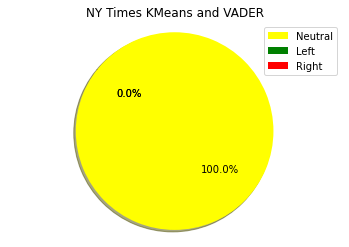

In [123]:
labels = ['Neutral', 'Left', 'Right']
neu = len(df1[df1['Bias1'] == -1])
left = len(df1[df1['Bias1'] == 0])
right = len(df1[df1['Bias1'] == 1])
sizes = [neu,left,right]
colors = ['yellow', 'green','red' ]
plt.pie(sizes,colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('NY Times KMeans and VADER')
plt.legend(labels,loc='upper right')
plt.savefig('Plots/KMeans/NYT_Bias1.png')
plt.show()

Bias by textblob.

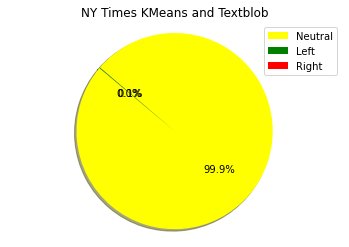

In [124]:
labels = ['Neutral', 'Left', 'Right']
neu = len(df1[df1['Bias2'] == -1])
left = len(df1[df1['Bias2'] == 0])
right = len(df1[df1['Bias2'] == 1])
sizes = [neu,left,right]
colors = ['yellow', 'green','red' ]
plt.pie(sizes,colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('NY Times KMeans and Textblob')
plt.legend(labels,loc='upper right')
plt.savefig('Plots/KMeans/NYT_Bias2.png')
plt.show()

### DBScan data.

In [125]:
df11 = pd.read_csv("Publications/Edit/DBS/NYT_new.csv")
df11.head()

,id,title,publication,author,date,year,month,url,content,Label,Party1,sent1,Bias1,sent2,Bias2
0,17285,"Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial ...",New York Times,Margalit Fox,2017-01-06,2017.0,1.0,NaN,"When Walt Disney’s “Bambi” opened in 1942, cri...",-1,0,neu,-1,0,-1
1,17286,"Among Deaths in 2016, a Heavy Toll in Pop Music",New York Times,William McDonald,2017-04-10,2017.0,4.0,NaN,"Death may be the great equalizer, but it isn’t...",-1,0,neu,-1,0,-1
2,17287,Kim Jong-un Says North Korea Is Preparing to T...,New York Times,Choe Sang-Hun,2017-01-02,2017.0,1.0,NaN,"SEOUL, South Korea — North Korea’s leader, ...",-1,0,neu,-1,0,-1
3,17288,"Sick With a Cold, Queen Elizabeth Misses New Y...",New York Times,Sewell Chan,2017-01-02,2017.0,1.0,NaN,"LONDON — Queen Elizabeth II, who has been b...",-1,0,neu,-1,0,-1
4,17289,Taiwan’s President Accuses China of Renewed In...,New York Times,Javier C. Hernández,2017-01-02,2017.0,1.0,NaN,BEIJING — President Tsai of Taiwan sharpl...,-1,0,neu,-1,0,-1


Bias by vader.

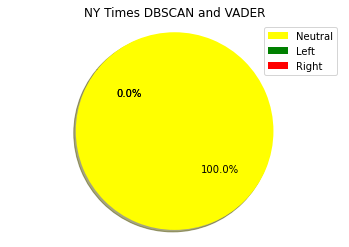

In [126]:
labels = ['Neutral', 'Left', 'Right']
neu = len(df11[df11['Bias1'] == -1])
left = len(df11[df11['Bias1'] == 0])
right = len(df11[df11['Bias1'] == 1])
sizes = [neu,left,right]
colors = ['yellow', 'green','red' ]
plt.pie(sizes,colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('NY Times DBSCAN and VADER')
plt.legend(labels,loc='upper right')
plt.savefig('Plots/DBS/NYT_Bias1.png')
plt.show()

Bias by textblob.

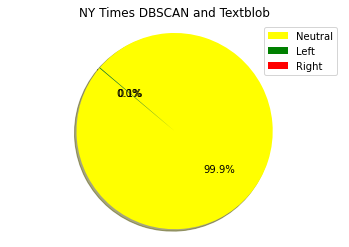

In [127]:
labels = ['Neutral', 'Left', 'Right']
neu = len(df11[df11['Bias2'] == -1])
left = len(df11[df11['Bias2'] == 0])
right = len(df11[df11['Bias2'] == 1])
sizes = [neu,left,right]
colors = ['yellow', 'green','red' ]
plt.pie(sizes,colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('NY Times DBSCAN and Textblob')
plt.legend(labels,loc='upper right')
plt.savefig('Plots/DBS/NYT_Bias2.png')
plt.show()

## CNN. 

### KMeans data.

In [128]:
df2 = pd.read_csv("Publications/Edit/KMeans/CNN_new.csv")
df2.head()

,id,title,publication,author,date,year,month,url,content,Label,Party1,sent1,Bias1,sent2,Bias2
0,50359,"Alabama, Clemson back in national title game",CNN,Jill Martin,2016-12-31,2016.0,12.0,NaN,Atlanta (CNN) This season’s College Football P...,3,1,neu,-1,0,-1
1,50360,New year celebrations ring in 2017,CNN,Ray Sanchez,2016-12-31,2016.0,12.0,NaN,(CNN) Revelers on the United States’ west coa...,0,0,neu,-1,0,-1
2,50361,Trump says he has inside information on hacking,CNN,Kevin Liptak,2017-01-01,2017.0,1.0,NaN,"West Palm Beach, Florida (CNN) Donald Trump s...",2,1,neu,-1,0,-1
3,50362,3 dead in Texas plane crash collision,CNN,Tony Marco,2017-01-01,2017.0,1.0,NaN,(CNN) Two small planes collided in Texas on S...,0,0,neu,-1,0,-1
4,50363,21 rescued from California theme park ride,CNN,NaN,2016-12-31,2016.0,12.0,NaN,(CNN) A ride up to see the sights of southern...,3,1,neu,-1,0,-1


Bias by vader.

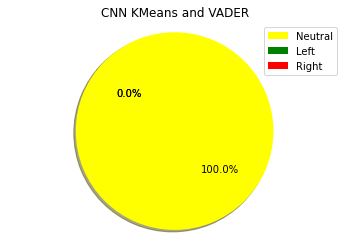

In [129]:
labels = ['Neutral', 'Left', 'Right']
neu = len(df2[df2['Bias1'] == -1])
left = len(df2[df2['Bias1'] == 0])
right = len(df2[df2['Bias1'] == 1])
sizes = [neu,left,right]
colors = ['yellow', 'green','red' ]
plt.pie(sizes,colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('CNN KMeans and VADER')
plt.legend(labels,loc='upper right')
plt.savefig('Plots/KMeans/CNN_Bias1.png')
plt.show()

Bias by textblob.

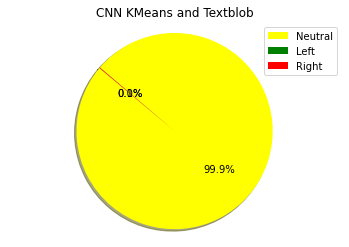

In [130]:
labels = ['Neutral', 'Left', 'Right']
neu = len(df2[df2['Bias2'] == -1])
left = len(df2[df2['Bias2'] == 0])
right = len(df2[df2['Bias2'] == 1])
sizes = [neu,left,right]
colors = ['yellow', 'green','red' ]
plt.pie(sizes,colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('CNN KMeans and Textblob')
plt.legend(labels,loc='upper right')
plt.savefig('Plots/KMeans/CNN_Bias2.png')
plt.show()

### DBScan data.

In [131]:
df22 = pd.read_csv("Publications/Edit/DBS/CNN_new.csv")
df22.head()

,id,title,publication,author,date,year,month,url,content,Label,Party1,sent1,Bias1,sent2,Bias2
0,50360,New year celebrations ring in 2017,CNN,Ray Sanchez,2016-12-31,2016.0,12.0,NaN,(CNN) Revelers on the United States’ west coa...,-1,1,neu,-1,0,-1
1,50361,Trump says he has inside information on hacking,CNN,Kevin Liptak,2017-01-01,2017.0,1.0,NaN,"West Palm Beach, Florida (CNN) Donald Trump s...",-1,1,neu,-1,0,-1
2,50362,3 dead in Texas plane crash collision,CNN,Tony Marco,2017-01-01,2017.0,1.0,NaN,(CNN) Two small planes collided in Texas on S...,-1,1,neu,-1,0,-1
3,50363,21 rescued from California theme park ride,CNN,NaN,2016-12-31,2016.0,12.0,NaN,(CNN) A ride up to see the sights of southern...,-1,1,neu,-1,0,-1
4,50364,Trump wishes Happy New Year to ’my many enemies’,CNN,Eugene Scott,2016-12-31,2016.0,12.0,NaN,(CNN) Donald Trump is not quite ready to let...,-1,1,neu,-1,0,-1


Bias by vader.

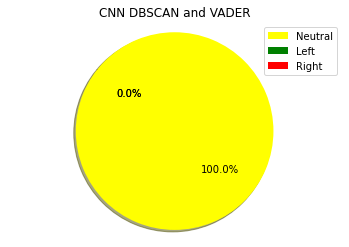

In [132]:
labels = ['Neutral', 'Left', 'Right']
neu = len(df22[df22['Bias1'] == -1])
left = len(df22[df22['Bias1'] == 0])
right = len(df22[df22['Bias1'] == 1])
sizes = [neu,left,right]
colors = ['yellow', 'green','red' ]
plt.pie(sizes,colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('CNN DBSCAN and VADER')
plt.legend(labels,loc='upper right')
plt.savefig('Plots/DBS/CNN_Bias1.png')
plt.show()

Bias by textblob.

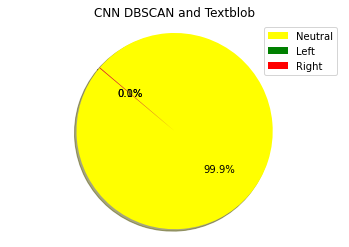

In [133]:
labels = ['Neutral', 'Left', 'Right']
neu = len(df22[df22['Bias2'] == -1])
left = len(df22[df22['Bias2'] == 0])
right = len(df22[df22['Bias2'] == 1])
sizes = [neu,left,right]
colors = ['yellow', 'green','red' ]
plt.pie(sizes,colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('CNN DBSCAN and Textblob')
plt.legend(labels,loc='upper right')
plt.savefig('Plots/DBS/CNN_Bias2.png')
plt.show()

## Washington Post. 

### KMeans data. 

In [134]:
df3 = pd.read_csv("Publications/Edit/KMeans/WP_new.csv")
df3.head()

,id,title,publication,author,date,year,month,url,content,Label,Party1,sent1,Bias1,sent2,Bias2
0,204034,"Putin won 2016, but Russia has its limits as a...",Washington Post,David Filipov,2016-12-31,2016.0,12.0,https://web.archive.org/web/20170101001641/htt...,MOSCOW ” In a New Year s address that came ...,0,0,neu,-1,0,-1
1,204035,Trump and Putin: A relationship where mutual a...,Washington Post,Karen DeYoung,2016-12-30,2016.0,12.0,https://web.archive.org/web/20170101001641/htt...,"For much of this year, Donald Trump and Vladi...",10,1,neu,-1,0,-1
2,204036,"Russian operation hacked a Vermont utility, sh...",Washington Post,Juliet Eilperin,2016-12-31,2016.0,12.0,https://web.archive.org/web/20170101001641/htt...,A code associated with the Russian hacking op...,0,0,neu,-1,0,-1
3,204037,Trump’s victory was history rhyming with itsel...,Washington Post,Joe Scarborough,2016-12-31,2016.0,12.0,https://web.archive.org/web/20170101001641/htt...,Americans view the election of a presiden...,10,1,neu,-1,0,-1
4,204038,It’s nearly 2017! Can we finally retire the cu...,Washington Post,Nicholas Pell,2016-12-30,2016.0,12.0,https://web.archive.org/web/20170101001641/htt...,"Looking back at 2016, it’s remarkable how...",0,0,neu,-1,0,-1


Bias by vader.

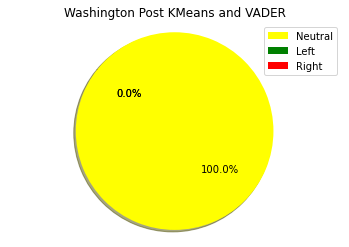

In [135]:
labels = ['Neutral', 'Left', 'Right']
neu = len(df3[df3['Bias1'] == -1])
left = len(df3[df3['Bias1'] == 0])
right = len(df3[df3['Bias1'] == 1])
sizes = [neu,left,right]
colors = ['yellow', 'green','red' ]
plt.pie(sizes,colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('Washington Post KMeans and VADER')
plt.legend(labels,loc='upper right')
plt.savefig('Plots/KMeans/WP_Bias1.png')
plt.show()

Bias by textblob.

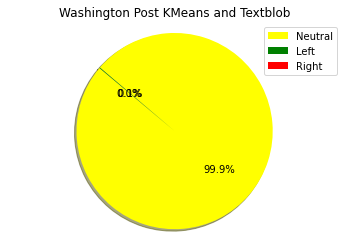

In [136]:
labels = ['Neutral', 'Left', 'Right']
neu = len(df3[df3['Bias2'] == -1])
left = len(df3[df3['Bias2'] == 0])
right = len(df3[df3['Bias2'] == 1])
sizes = [neu,left,right]
colors = ['yellow', 'green','red' ]
plt.pie(sizes,colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('Washington Post KMeans and Textblob')
plt.legend(labels,loc='upper right')
plt.savefig('Plots/KMeans/WP_Bias2.png')
plt.show()

### DBScan data. 

In [137]:
df33 = pd.read_csv("Publications/Edit/DBS/WP_new.csv")
df33.head()

,id,title,publication,author,date,year,month,url,content,Label,Party1,sent1,Bias1,sent2,Bias2
0,204035,Trump and Putin: A relationship where mutual a...,Washington Post,Karen DeYoung,2016-12-30,2016.0,12.0,https://web.archive.org/web/20170101001641/htt...,"For much of this year, Donald Trump and Vladi...",-1,1,neu,-1,0,-1
1,204036,"Russian operation hacked a Vermont utility, sh...",Washington Post,Juliet Eilperin,2016-12-31,2016.0,12.0,https://web.archive.org/web/20170101001641/htt...,A code associated with the Russian hacking op...,-1,1,neu,-1,0,-1
2,204037,Trump’s victory was history rhyming with itsel...,Washington Post,Joe Scarborough,2016-12-31,2016.0,12.0,https://web.archive.org/web/20170101001641/htt...,Americans view the election of a presiden...,-1,1,neu,-1,0,-1
3,204038,It’s nearly 2017! Can we finally retire the cu...,Washington Post,Nicholas Pell,2016-12-30,2016.0,12.0,https://web.archive.org/web/20170101001641/htt...,"Looking back at 2016, it’s remarkable how...",-1,1,neu,-1,0,-1
4,204039,Five myths about the Presidentâ€™s Daily Brief,Washington Post,David Priess,2016-12-29,2016.0,12.0,https://web.archive.org/web/20170101001641/htt...,"David Priess, a former analyst and daily in...",-1,1,neu,-1,0,-1


Bias by vader.

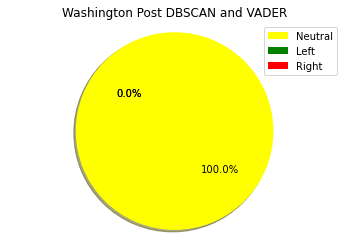

In [138]:
labels = ['Neutral', 'Left', 'Right']
neu = len(df33[df33['Bias1'] == -1])
left = len(df33[df33['Bias1'] == 0])
right = len(df33[df33['Bias1'] == 1])
sizes = [neu,left,right]
colors = ['yellow', 'green','red' ]
plt.pie(sizes,colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('Washington Post DBSCAN and VADER')
plt.legend(labels,loc='upper right')
plt.savefig('Plots/DBS/WP_Bias1.png')
plt.show()

Bias by textblob.

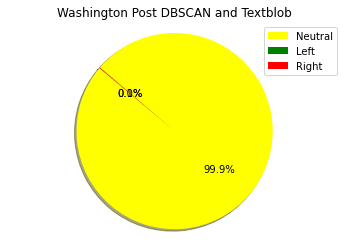

In [139]:
labels = ['Neutral', 'Left', 'Right']
neu = len(df33[df33['Bias2'] == -1])
left = len(df33[df33['Bias2'] == 0])
right = len(df33[df33['Bias2'] == 1])
sizes = [neu,left,right]
colors = ['yellow', 'green','red' ]
plt.pie(sizes,colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('Washington Post DBSCAN and Textblob')
plt.legend(labels,loc='upper right')
plt.savefig('Plots/DBS/WP_Bias2.png')
plt.show()